<a href="https://colab.research.google.com/github/7PAM2015-0509-2023-Team-8/Kaggle-Challenge/blob/main/Kaggle_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
print("Hello Team 8 !")

Hello Team 8 !


In [ ]:
pip install catboost

#Importing libraries



In [ ]:
#installing lib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
%matplotlib inline
sns.set(style="darkgrid",font_scale=1.5)
pd.set_option("display.max.rows",None)
pd.set_option("display.max.columns",None)


from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, StackingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier


from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler

from imblearn.over_sampling import SMOTE

import missingno as msno

##Loading datasets

In [ ]:
# Load the data
train_df = pd.read_csv("https://raw.githubusercontent.com/7PAM2015-0509-2023-Team-8/Kaggle-Challenge/main/train.csv")
test_df = pd.read_csv("https://raw.githubusercontent.com/7PAM2015-0509-2023-Team-8/Kaggle-Challenge/main/test.csv")


In [ ]:
print("Training Dataset shape is: ",train_df.shape)
print("Testing Dataset shape is: ",test_df.shape)

Training Dataset shape is:  (8693, 14)
Testing Dataset shape is:  (4277, 13)


In [ ]:
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [ ]:
test_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


###FInding duplicates value in test train data

In [ ]:
print(f"Duplicates in Train Dataset is:{train_df.duplicated().sum()},({100*train_df.duplicated().sum()/len(train_df)})%")
print(f"Duplicates in Test Dataset is:{test_df.duplicated().sum()},({100*test_df.duplicated().sum()/len(test_df)})%")

Duplicates in Train Dataset is:0,(0.0)%
Duplicates in Test Dataset is:0,(0.0)%


##Data types

In [ ]:
print("Data Types of features of Training Data is:")
print(train_df.dtypes)
print("\n"+"-"*100)
print("\nData types of features of Testing Data is:")
print(test_df.dtypes)

Data Types of features of Training Data is:
PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

----------------------------------------------------------------------------------------------------

Data types of features of Testing Data is:
PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
dtype: object


In [ ]:
print("cardinality of categorical features in training datasets is:")
print(train_df.select_dtypes(include="object").nunique())
print("\n","-"*70)
print("\nCardinality of categorical features in testing datsets is:")
print(test_df.select_dtypes(include="object").nunique())

cardinality of categorical features in training datasets is:
PassengerId    8693
HomePlanet        3
CryoSleep         2
Cabin          6560
Destination       3
VIP               2
Name           8473
dtype: int64

 ----------------------------------------------------------------------

Cardinality of categorical features in testing datsets is:
PassengerId    4277
HomePlanet        3
CryoSleep         2
Cabin          3265
Destination       3
VIP               2
Name           4176
dtype: int64


---
# **Exploratory Data Analysis (EDA)**
---

###Transported Feature Distribution

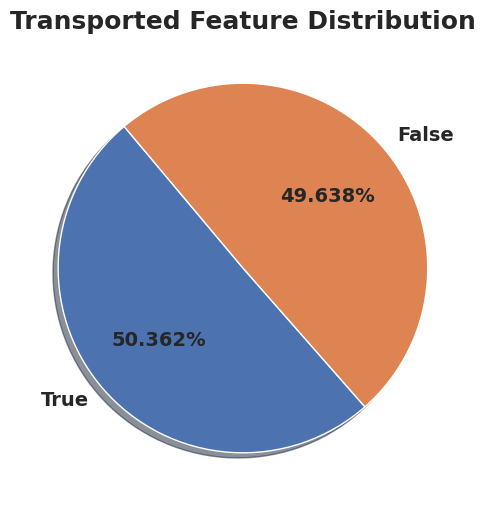

In [ ]:
# Define the data and labels
values = train_df["Transported"].value_counts()
labels = values.keys()

# Create a pie chart
plt.figure(figsize=(10, 6))
plt.pie(
    values,
    labels=labels,
    autopct="%1.3f%%",
    textprops={"fontsize": 14, "fontweight": "bold"},
    shadow=True,
    startangle=130,
)

# Set plot title
plt.title("Transported Feature Distribution", fontsize=18, fontweight='bold')

# Show the plot
plt.show()

#Age Feature Distribution

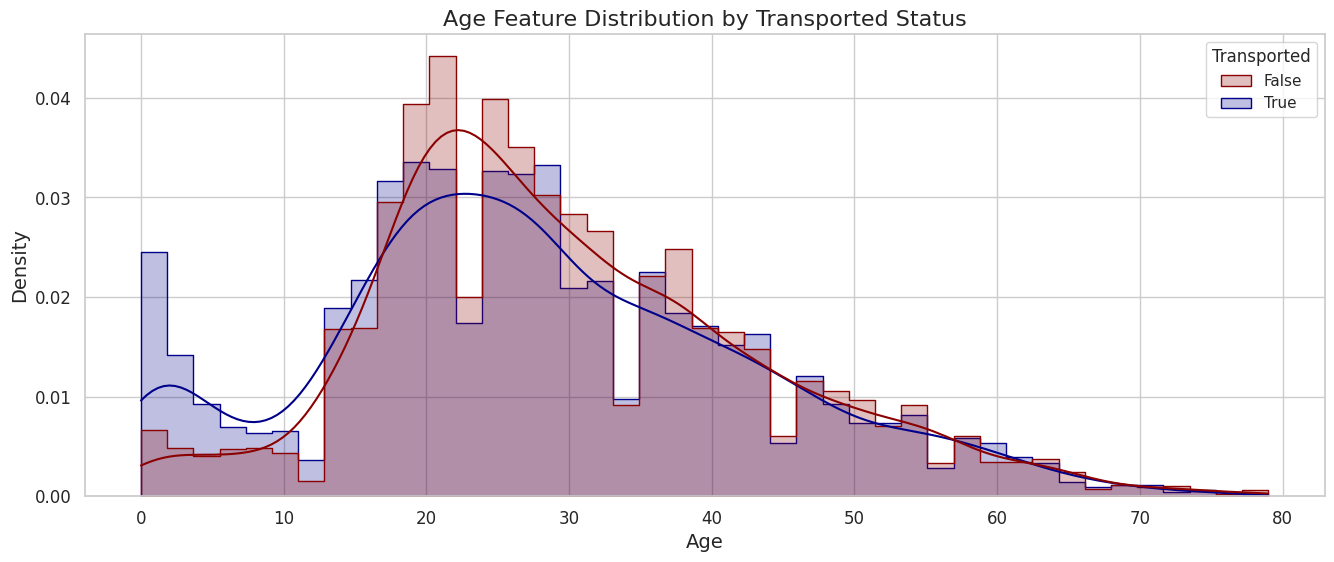

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

custom_palette = ["#8B0000", "#00008B"]

# Create the plot
plt.figure(figsize=(16, 6))
sns.histplot(
    data=train_df,
    x="Age",
    hue="Transported",
    kde=True,
    palette=custom_palette,
    element="step",
    stat="density",
    common_norm=False
)

# Set plot title and labels
plt.title("Age Feature Distribution by Transported Status", fontsize=16)
plt.xlabel("Age", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.show()

##Defining by expenditure coloum

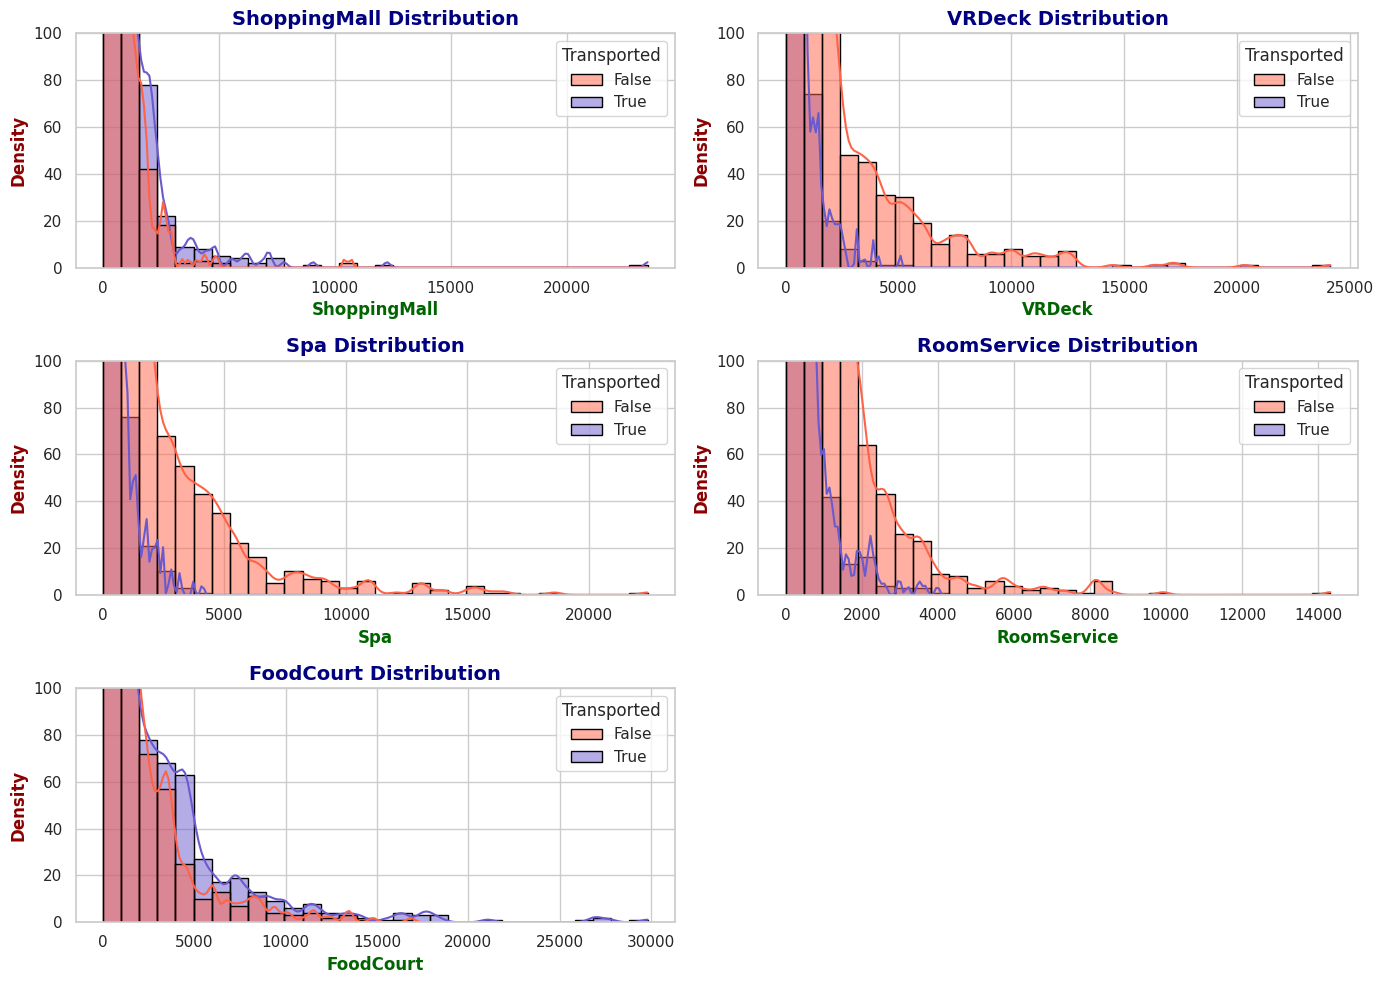

In [ ]:
# Define expenditure columns
exp_cols = ["ShoppingMall","VRDeck","Spa","RoomService", "FoodCourt"]

# Set custom colors for plot
custom_palette = ["#FF6347", "#6A5ACD"]
# Create the plot
plt.figure(figsize=(14, 10))

for idx, column in enumerate(exp_cols):
    plt.subplot(3, 2, idx + 1)
    sns.histplot(
        x=column,
        hue="Transported",
        data=train_df,
        bins=30,
        kde=True,
        palette=custom_palette,
        edgecolor='black',  # Add black edges to bars for visibility
    )
    plt.title(f"{column} Distribution", fontsize=14, fontweight='bold', color='navy')
    plt.xlabel(column, fontsize=12, fontweight='bold', color='darkgreen')
    plt.ylabel("Density", fontsize=12, fontweight='bold', color='darkred')
    plt.ylim(0, 100)
    plt.tight_layout()

plt.show()

##Category Destribution vs Count

In [ ]:
train_df["PassengerId"].head().to_frame()

def passengerid_new_features(df):

    #Splitting Group and Member values from "PassengerId" column.
    df["Group"] = df["PassengerId"].apply(lambda x: x.split("_")[0])
    df["Member"] =df["PassengerId"].apply(lambda x: x.split("_")[1])

    #Grouping the "Group" feature with respect to "member" feature to check which group is travelling with how many members
    x = df.groupby("Group")["Member"].count().sort_values()

    #Creating a set of group values which are travelling with more than 1 members.
    y = set(x[x>1].index)

    #Creating a new feature "Solo" which will indicate whether the person is travelling solo or not.
    df["Travelling_Solo"] = df["Group"].apply(lambda x: x not in y)

    #Creating a new feature "Group_size" which will indicate each group number of members.
    df["Group_Size"]=0
    for i in x.items():
        df.loc[df["Group"]==i[0],"Group_Size"]=i[1]

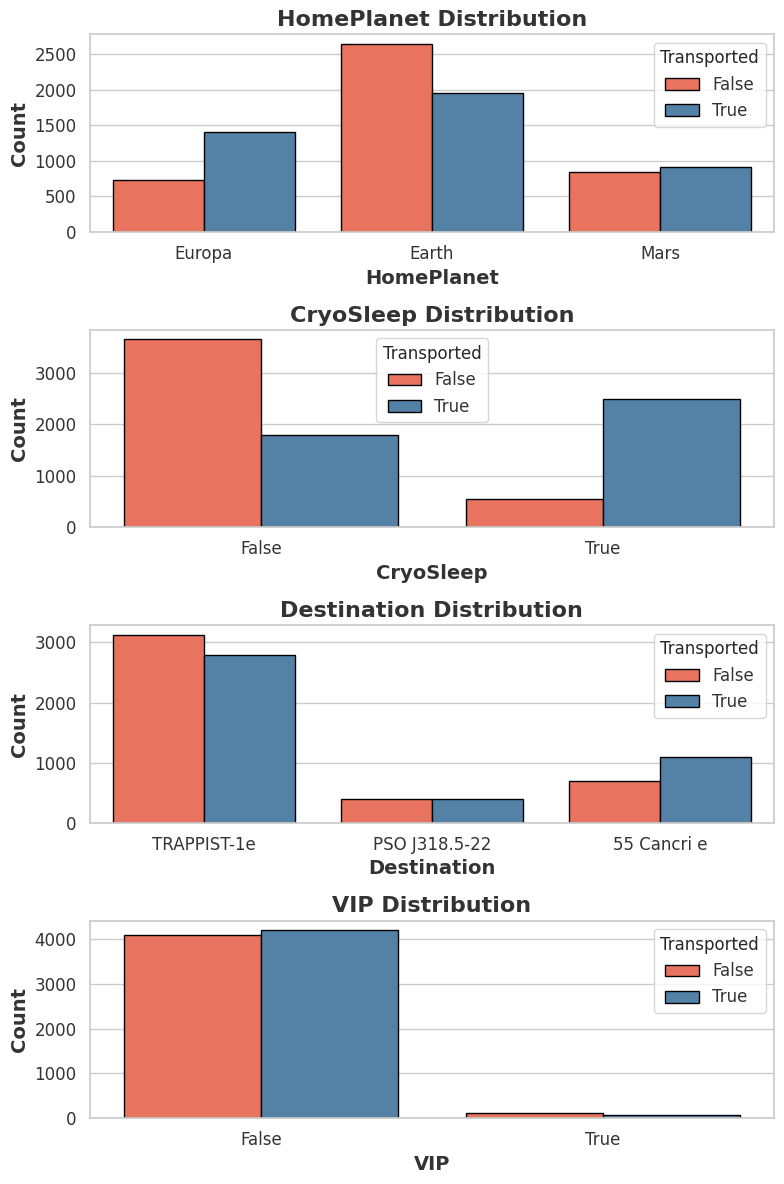

In [ ]:
passengerid_new_features(train_df)
passengerid_new_features(test_df)

train_df.drop(columns=["Group","Member"],inplace=True)
test_df.drop(columns=["Group","Member"],inplace=True)

# Define categorical columns
cat_cols = ["HomePlanet", "CryoSleep", "Destination", "VIP"]

# Set custom colors for plot
custom_palette = ["#FF6347", "#4682B4"]

# Create the plot
plt.figure(figsize=(8, 12))

for idx, column in enumerate(cat_cols):
    plt.subplot(4, 1, idx + 1)
    sns.countplot(
        x=column,
        hue="Transported",
        data=train_df,
        palette=custom_palette,
        edgecolor='black',
    )
    plt.title(f"{column} Distribution", fontsize=16, fontweight='bold', color='#333333')
    plt.xlabel(column, fontsize=14, fontweight='bold', color='#333333')
    plt.ylabel("Count", fontsize=14, fontweight='bold', color='#333333')
    plt.xticks(fontsize=12, color='#333333')
    plt.yticks(fontsize=12, color='#333333')
    plt.legend(title="Transported", fontsize=12, title_fontsize=12, labelcolor='#333333')
    plt.tight_layout()

plt.show()

###Training data frame

In [ ]:
train_df[["RoomService","FoodCourt","ShoppingMall","Spa","VRDeck"]].head(4)

,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0.0,0.0,0.0,0.0,0.0
1,109.0,9.0,25.0,549.0,44.0
2,43.0,3576.0,0.0,6715.0,49.0
3,0.0,1283.0,371.0,3329.0,193.0


# Visualizing Total Expenditure

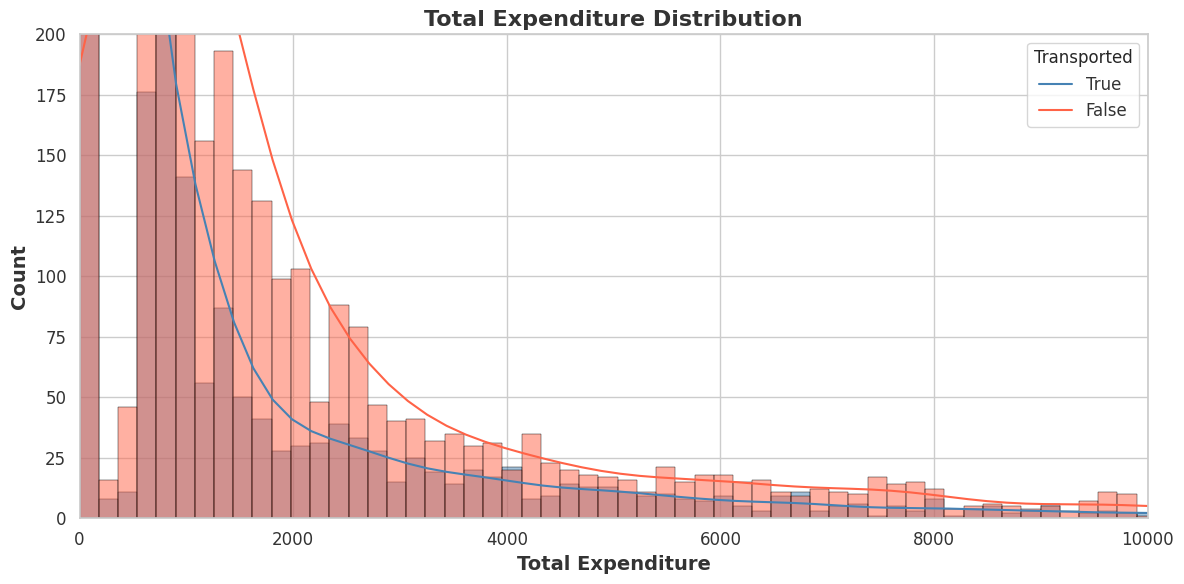

In [ ]:
exp_cols = ["RoomService","FoodCourt","ShoppingMall","Spa","VRDeck"]

def new_exp_features(df):
    df["Total Expenditure"] = df[exp_cols].sum(axis=1)
    df["No Spending"] = (df["Total Expenditure"]==0)
new_exp_features(train_df)
new_exp_features(test_df)

# Set custom colors
custom_palette = ["#FF6347", "#4682B4"]

#plotting the graph
plt.figure(figsize=(12, 6))
sns.histplot(
    x="Total Expenditure",
    hue="Transported",
    data=train_df,
    kde=True,
    palette=custom_palette,
    bins=200,
    edgecolor='black',
)

plt.ylim(0, 200)
plt.xlim(0, 10000)
plt.title("Total Expenditure Distribution", fontsize=16, fontweight='bold', color='#333333')
plt.xlabel("Total Expenditure", fontsize=14, fontweight='bold', color='#333333')
plt.ylabel("Count", fontsize=14, fontweight='bold', color='#333333')
plt.xticks(fontsize=12, color='#333333')
plt.yticks(fontsize=12, color='#333333')
plt.legend(title="Transported", fontsize=12, title_fontsize=12, labelcolor='#333333', labels=['True', 'False'])
plt.tight_layout()

plt.show()

## No Spending & Expenditure Category




Mean value of Total Expenditure feature is =  1441
Median value of Total Expenditure feature is =  716.0


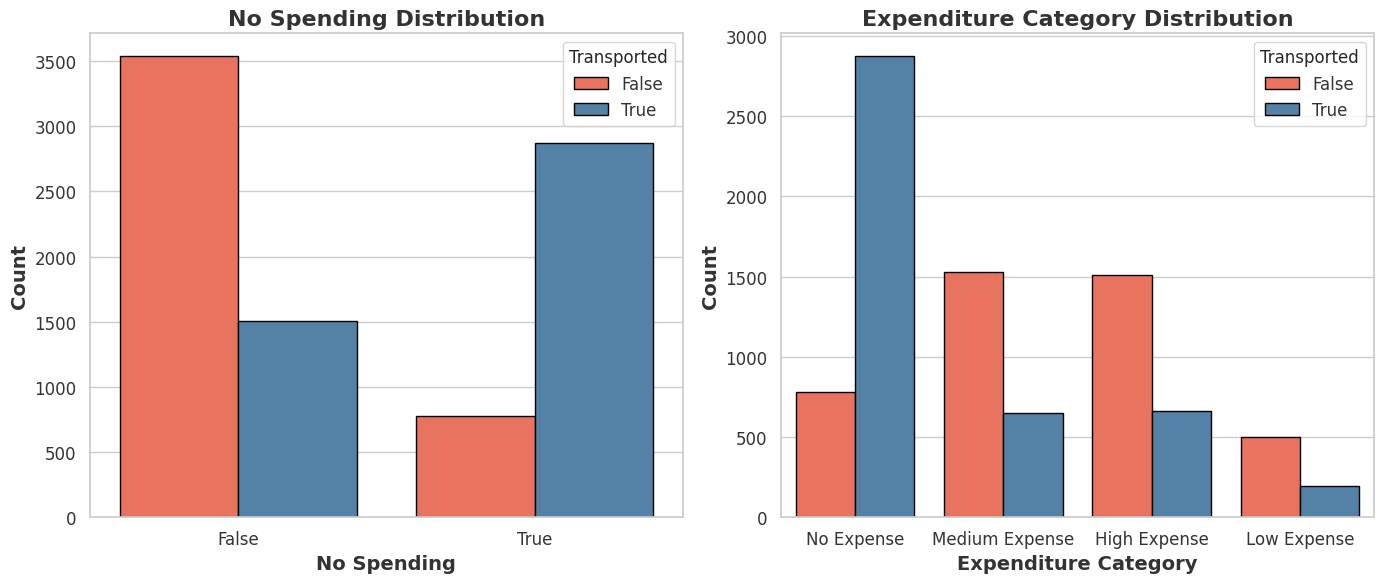

In [ ]:
mean = round(train_df["Total Expenditure"].mean())
median = train_df["Total Expenditure"].median()

print("Mean value of Total Expenditure feature is = ",mean)
print("Median value of Total Expenditure feature is = ",median)


def expenditure_category(df):
    expense_category = []

    for i in df["Total Expenditure"]:
        if i==0:
            expense_category.append("No Expense")
        elif (i>0 and i<=716):
            expense_category.append("Low Expense")
        elif (i>716 and i<=1441):
            expense_category.append("Medium Expense")
        elif (i>1441):
            expense_category.append("High Expense")

    df["Expenditure Category"] = expense_category

expenditure_category(train_df)
expenditure_category(test_df)

# plotting the graph and columns of interest
cols = ["No Spending", "Expenditure Category"]

# Set custom colors
custom_palette = ["#FF6347", "#4682B4"]

# Create the plot
plt.figure(figsize=(14, 6))

for idx, column in enumerate(cols):
    plt.subplot(1, 2, idx + 1)
    sns.countplot(
        x=column,
        hue="Transported",
        data=train_df,
        palette=custom_palette,
        edgecolor='black',
    )
    plt.title(f"{column} Distribution", fontsize=16, fontweight='bold', color='#333333')
    plt.xlabel(column, fontsize=14, fontweight='bold', color='#333333')
    plt.ylabel("Count", fontsize=14, fontweight='bold', color='#333333')
    plt.xticks(fontsize=12, color='#333333')
    plt.yticks(fontsize=12, color='#333333')
    plt.legend(title="Transported", fontsize=12, title_fontsize=12, labelcolor='#333333')
    plt.tight_layout()

plt.show()

#Group_Size & Travelling_Solo

In [ ]:
train_df["PassengerId"].head().to_frame()

,PassengerId
0,0001_01
1,0002_01
2,0003_01
3,0003_02
4,0004_01


In [ ]:
def passengerid_new_features(df):

    #Splitting Group and Member values from "PassengerId" column.
    df["Group"] = df["PassengerId"].apply(lambda x: x.split("_")[0])
    df["Member"] =df["PassengerId"].apply(lambda x: x.split("_")[1])

    #Grouping the "Group" feature with respect to "member" feature to check which group is travelling with how many members
    x = df.groupby("Group")["Member"].count().sort_values()

    #Creating a set of group values which are travelling with more than 1 members.
    y = set(x[x>1].index)

    #Creating a new feature "Solo" which will indicate whether the person is travelling solo or not.
    df["Travelling_Solo"] = df["Group"].apply(lambda x: x not in y)

    #Creating a new feature "Group_size" which will indicate each group number of members.
    df["Group_Size"]=0
    for i in x.items():
        df.loc[df["Group"]==i[0],"Group_Size"]=i[1]

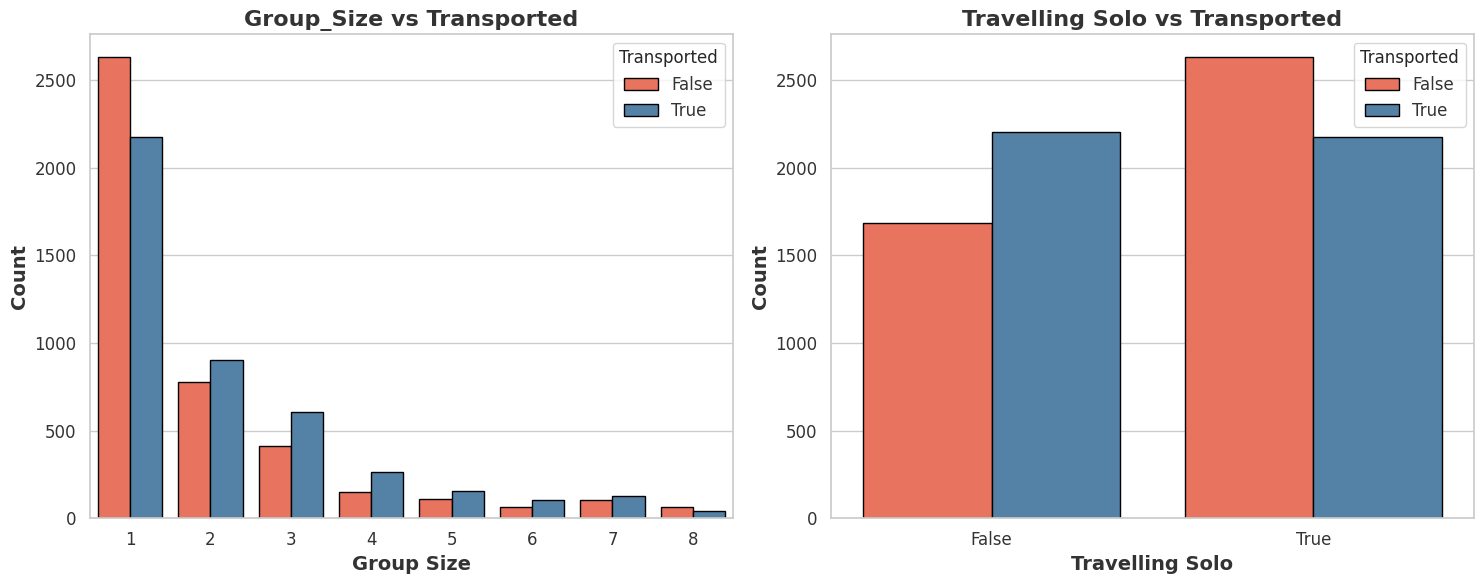

In [ ]:
passengerid_new_features(train_df)
passengerid_new_features(test_df)

passengerid_new_features(train_df)
passengerid_new_features(test_df)


# Set custom colors for plot
custom_palette = ["#FF6347", "#4682B4"]

# Create the plot
plt.figure(figsize=(15, 6))

# Plot for Group_Size vs Transported
plt.subplot(1, 2, 1)
sns.countplot(
    x="Group_Size",
    hue="Transported",
    data=train_df,
    palette=custom_palette,
    edgecolor='black',
)
plt.title("Group_Size vs Transported", fontsize=16, fontweight='bold', color='#333333')
plt.xlabel("Group Size", fontsize=14, fontweight='bold', color='#333333')
plt.ylabel("Count", fontsize=14, fontweight='bold', color='#333333')
plt.xticks(fontsize=12, color='#333333')
plt.yticks(fontsize=12, color='#333333')
plt.legend(title="Transported", fontsize=12, title_fontsize=12, labelcolor='#333333')

# Plot for Travelling Solo vs Transported
plt.subplot(1, 2, 2)
sns.countplot(
    x="Travelling_Solo",
    hue="Transported",
    data=train_df,
    palette=custom_palette,
    edgecolor='black',
)
plt.title("Travelling Solo vs Transported", fontsize=16, fontweight='bold', color='#333333')
plt.xlabel("Travelling Solo", fontsize=14, fontweight='bold', color='#333333')
plt.ylabel("Count", fontsize=14, fontweight='bold', color='#333333')
plt.xticks(fontsize=12, color='#333333')
plt.yticks(fontsize=12, color='#333333')
plt.legend(title="Transported", fontsize=12, title_fontsize=12, labelcolor='#333333')
plt.tight_layout()
plt.show()

---
# **Data Preparation Techniques**
---

###Calculating Missing Values

In [ ]:
z = train_df.isnull().sum()[train_df.isnull().sum()>0].to_frame().rename(columns={0:"No. of Missing values"})
z["% of Missing values"] = round(train_df.isnull().sum()[train_df.isnull().sum()>0]*100/len(train_df),2)
z

,No. of Missing values,% of Missing values
HomePlanet,201,2.31
CryoSleep,217,2.50
Cabin,199,2.29
Destination,182,2.09
Age,179,2.06
VIP,203,2.34
RoomService,181,2.08
FoodCourt,183,2.11
ShoppingMall,208,2.39
Spa,183,2.11


MIssing value heat map

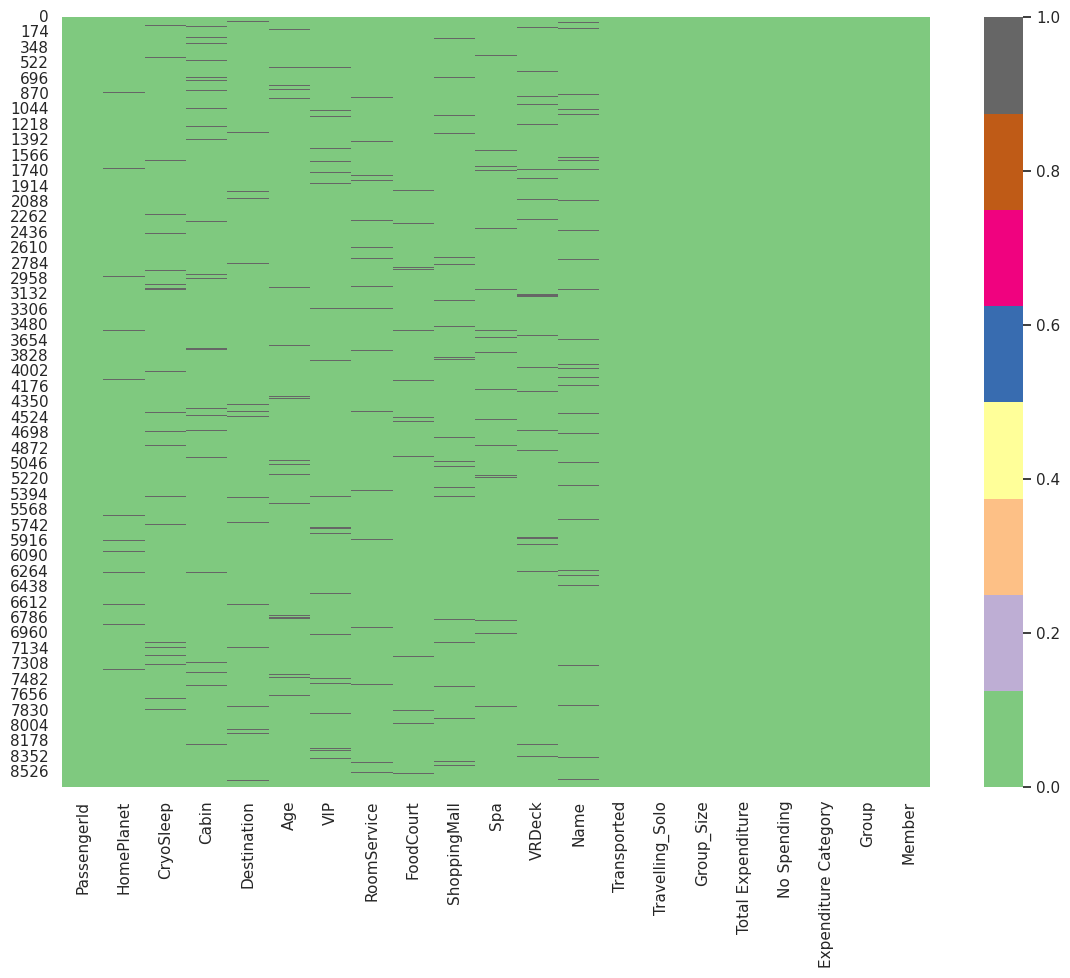

In [ ]:
plt.figure(figsize=(14,10))
sns.heatmap(train_df.isnull(),cmap="Accent")
plt.show()

#### Correlation Matrix

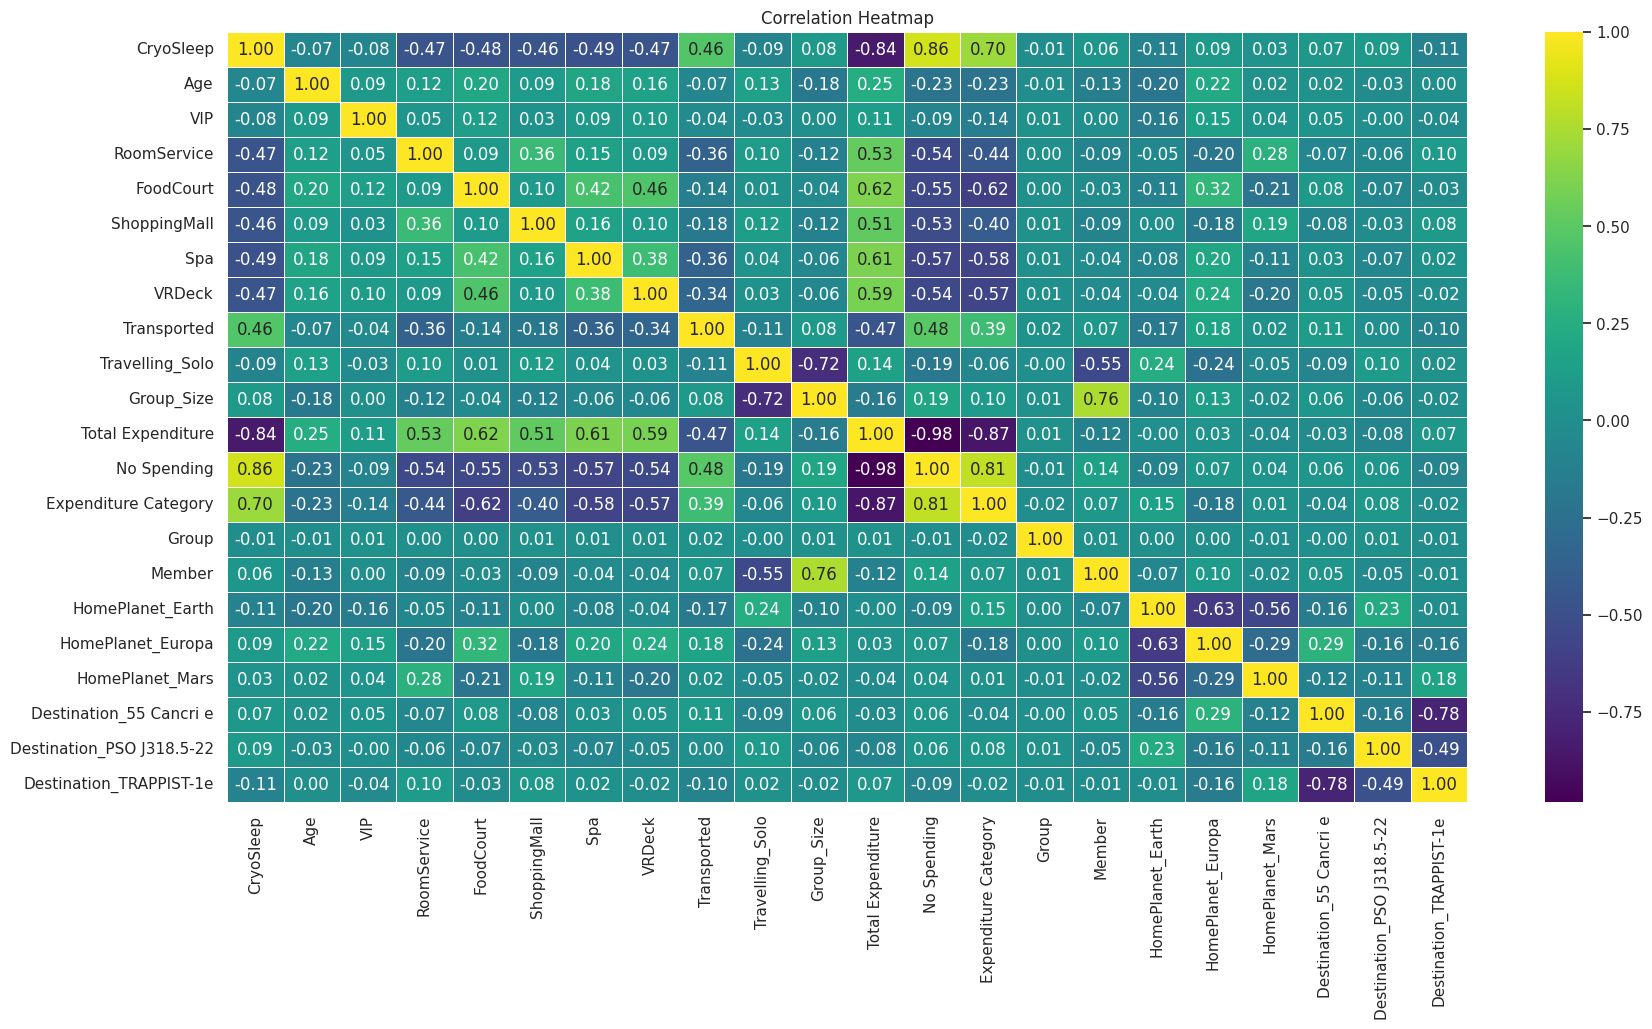

In [ ]:
correlation_matrix=train_df.corr()
correlation_matrix
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='viridis', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

###Finding the missing values and filling that values

In [ ]:
cat_cols = train_df.select_dtypes(include=["object","bool"]).columns.tolist()
cat_cols.remove("Transported")
num_cols = train_df.select_dtypes(include=["int","float"]).columns.tolist()

print("Categorical Columns:",cat_cols)
print("\n","-"*50)
print("\nNumerical Columns:",num_cols)

Categorical Columns: ['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP', 'Name', 'Travelling_Solo', 'No Spending', 'Expenditure Category', 'Group', 'Member']

 --------------------------------------------------

Numerical Columns: ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Group_Size', 'Total Expenditure']


In [ ]:
imputer1 = SimpleImputer(strategy="most_frequent")
imputer2 = SimpleImputer(strategy="median")

def fill_missingno(df):
    df[cat_cols] = imputer1.fit_transform(df[cat_cols])
    df[num_cols] = imputer2.fit_transform(df[num_cols])

fill_missingno(train_df)
fill_missingno(test_df)

print("Missing numbers left in train_df is:",train_df.isnull().sum().sum())
print("Missing numbers left in test_df is:",test_df.isnull().sum().sum())

Missing numbers left in train_df is: 0
Missing numbers left in test_df is: 0


In [ ]:
print("Duplicate values in training data is: ",train_df.duplicated().sum())
print("Duplicate values in testing data is: ",test_df.duplicated().sum())

Duplicate values in training data is:  0
Duplicate values in testing data is:  0


###Cardinality

In [ ]:
print("Cardinality of features in numerical data is: ")
print(train_df.select_dtypes(include=["object"]).nunique())
print("\n","-"*70)
print("\nCardinality of features in categorical data is: ")
print(test_df.select_dtypes(include=["object"]).nunique())

Cardinality of features in numerical data is: 
PassengerId             8693
HomePlanet                 3
CryoSleep                  2
Cabin                   6560
Destination                3
VIP                        2
Name                    8473
Travelling_Solo            2
No Spending                2
Expenditure Category       4
Group                   6217
Member                     8
dtype: int64

 ----------------------------------------------------------------------

Cardinality of features in categorical data is: 
PassengerId             4277
HomePlanet                 3
CryoSleep                  2
Cabin                   3265
Destination                3
VIP                        2
Name                    4176
Travelling_Solo            2
No Spending                2
Expenditure Category       4
Group                   3063
Member                     8
dtype: int64


In [ ]:
pass_df = test_df[["PassengerId"]]

cols = ["PassengerId","Cabin","Name"]
train_df.drop(columns =cols, inplace=True)
test_df.drop(columns=cols, inplace=True)

train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,8693.0,28.790291,14.341404,0.0,20.0,27.0,37.0,79.0
RoomService,8693.0,220.009318,660.519050,0.0,0.0,0.0,41.0,14327.0
FoodCourt,8693.0,448.434027,1595.790627,0.0,0.0,0.0,61.0,29813.0
ShoppingMall,8693.0,169.572300,598.007164,0.0,0.0,0.0,22.0,23492.0
Spa,8693.0,304.588865,1125.562559,0.0,0.0,0.0,53.0,22408.0
VRDeck,8693.0,298.261820,1134.126417,0.0,0.0,0.0,40.0,24133.0
Group_Size,8693.0,2.035546,1.596347,1.0,1.0,1.0,3.0,8.0
Total Expenditure,8693.0,1440.866329,2803.045694,0.0,0.0,716.0,1441.0,35987.0


## Log Transformation

In [ ]:
cols = ['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','Total Expenditure']

for value in cols:
    train_df[value] = np.log(1+train_df[value])
    test_df[value]=np.log(1+test_df[value])

<Figure size 2000x3500 with 0 Axes>

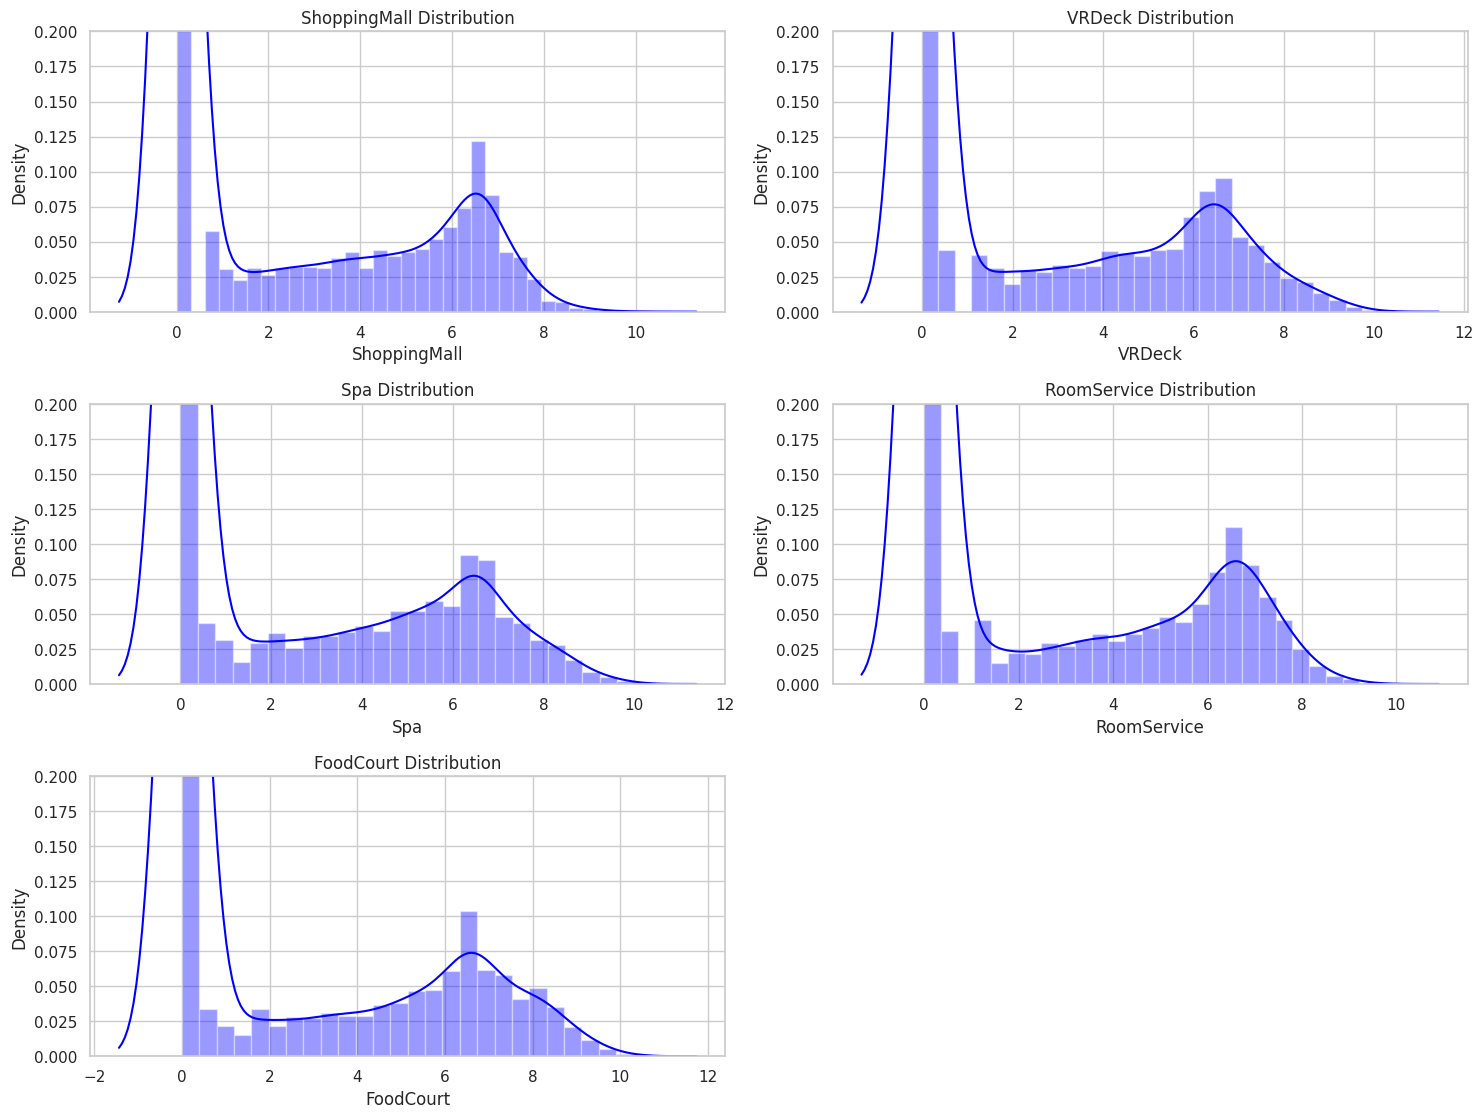

In [ ]:
cols = ["ShoppingMall","VRDeck","Spa","RoomService", "FoodCourt"]

plt.figure(figsize=(20, 35))
x = 1

plt.figure(figsize=(15,22))
for i in cols:
    plt.subplot(6,2,x)
    sns.distplot(train_df[i],color="blue")
    plt.ylim(0,0.2)
    plt.title(f"{i} Distribution")
    plt.tight_layout()
    x+=1
plt.show()

In [ ]:
train_df.dtypes

HomePlanet               object
CryoSleep                object
Destination              object
Age                     float64
VIP                      object
RoomService             float64
FoodCourt               float64
ShoppingMall            float64
Spa                     float64
VRDeck                  float64
Transported                bool
Travelling_Solo          object
Group_Size              float64
Total Expenditure       float64
No Spending              object
Expenditure Category     object
Group                    object
Member                   object
dtype: object

In [ ]:
cols = ["CryoSleep","VIP","Travelling_Solo","No Spending"]

train_df[cols] = train_df[cols].astype(bool)
test_df[cols] = test_df[cols].astype(bool)

##Encoding


In [ ]:
cols = ["CryoSleep","VIP","Travelling_Solo","No Spending"]

train_df[cols] = train_df[cols].astype(bool)
test_df[cols] = test_df[cols].astype(bool)

In [ ]:
# One Hot Encoding for nominal categorical data
nominal_cat_cols = ["HomePlanet","Destination"]

# LabelEncoding for ordinal categorical data
ordinal_cat_cols = ["CryoSleep","VIP","Travelling_Solo","No Spending","Expenditure Category"]

In [ ]:
enc = LabelEncoder()

In [ ]:
train_df[ordinal_cat_cols] = train_df[ordinal_cat_cols].apply(enc.fit_transform)
test_df[ordinal_cat_cols] = test_df[ordinal_cat_cols].apply(enc.fit_transform)

In [ ]:
train_df = pd.get_dummies(train_df,columns=nominal_cat_cols)
test_df = pd.get_dummies(test_df,columns=nominal_cat_cols)

In [ ]:
train_df["Transported"].replace({False:0,True:1},inplace=True)

In [ ]:
train_df.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Travelling_Solo,Group_Size,Total Expenditure,No Spending,Expenditure Category,Group,Member,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,0,39.0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0,1,1.0,0.000000,1,3,0001,01,False,True,False,False,False,True
1,0,24.0,0,4.700480,2.302585,3.258097,6.309918,3.806662,1,1,1.0,6.602588,0,2,0002,01,True,False,False,False,False,True
2,0,58.0,1,3.784190,8.182280,0.000000,8.812248,3.912023,0,0,2.0,9.248021,0,0,0003,01,False,True,False,False,False,True
3,0,33.0,0,0.000000,7.157735,5.918894,8.110728,5.267858,0,0,2.0,8.551981,0,0,0003,02,False,True,False,False,False,True
4,0,16.0,0,5.717028,4.262680,5.023881,6.338594,1.098612,1,1,1.0,6.995766,0,2,0004,01,True,False,False,False,False,True


In [ ]:
test_df.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Travelling_Solo,Group_Size,Total Expenditure,No Spending,Expenditure Category,Group,Member,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,1,27.0,0,0.000000,0.000000,0.000000,0.000000,0.00000,1,1.0,0.000000,1,3,0013,01,True,False,False,False,False,True
1,0,19.0,0,0.000000,2.302585,0.000000,7.945910,0.00000,1,1.0,7.949091,0,0,0018,01,True,False,False,False,False,True
2,1,31.0,0,0.000000,0.000000,0.000000,0.000000,0.00000,1,1.0,0.000000,1,3,0019,01,False,True,False,True,False,False
3,0,38.0,0,0.000000,8.802823,0.000000,5.204007,6.37332,1,1.0,8.911800,0,0,0021,01,False,True,False,False,False,True
4,0,20.0,0,2.397895,0.000000,6.455199,0.000000,0.00000,1,1.0,6.470800,0,1,0023,01,True,False,False,False,False,True


# Selecting The Data And Scaling The Data For Model Training




In [ ]:
X = train_df.drop(columns=["Transported"])
y = train_df[["Transported"]]

In [ ]:
scaler = StandardScaler()

In [ ]:
X_scaled = scaler.fit_transform(X)
test_df_scaled = scaler.fit_transform(test_df)

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

print(f"x_train shape is: {x_train.shape}")
print(f"y_train shape is: {y_train.shape}")

print(f"x_test shape is: {x_test.shape}")
print(f"y_test shape is: {y_test.shape}")

x_train shape is: (6954, 21)
y_train shape is: (6954, 1)
x_test shape is: (1739, 21)
y_test shape is: (1739, 1)


In [ ]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(X_scaled,y,test_size=0.2,random_state=0)

print(f"x_train1 shape is: {x_train1.shape}")
print(f"y_train1 shape is: {y_train1.shape}")

print(f"x_test1 shape is: {x_test1.shape}")
print(f"y_test1 shape is: {y_test1.shape}")

x_train1 shape is: (6954, 21)
y_train1 shape is: (6954, 1)
x_test1 shape is: (1739, 21)
y_test1 shape is: (1739, 1)


# Model Building For Scaled & Un-scaled Data

##1. Scaled Data




In [ ]:
training_score = []
testing_score = []

In [ ]:
def model_prediction(model):
    model.fit(x_train1,y_train1)
    x_train_pred1 = model.predict(x_train1)
    x_test_pred1 = model.predict(x_test1)
    a = accuracy_score(y_train1,x_train_pred1)*100
    b = accuracy_score(y_test1,x_test_pred1)*100
    training_score.append(a)
    testing_score.append(b)

    print(f"Accuracy_Score of {model} model on Training Data is:",a)
    print(f"Accuracy_Score of {model} model on Testing Data is:",b)
    print("-"*70)
    print(f"Precision Score of {model} model is:",precision_score(y_test1,x_test_pred1))
    print(f"Recall Score of {model} model is:",recall_score(y_test1,x_test_pred1))
    print(f"F1 Score of {model} model is:",f1_score(y_test1,x_test_pred1))
    print("-"*70)
    print(f"Confusion Matrix of {model} model is:")
    cm = confusion_matrix(y_test1,x_test_pred1)
    plt.figure(figsize=(8,4))
    sns.heatmap(cm,annot=True,fmt="g",cmap="magma")
    plt.show()

Accuracy_Score of LogisticRegression() model on Training Data is: 77.2073626689675
Accuracy_Score of LogisticRegression() model on Testing Data is: 77.05577918343876
----------------------------------------------------------------------
Precision Score of LogisticRegression() model is: 0.7583965330444203
Recall Score of LogisticRegression() model is: 0.7990867579908676
F1 Score of LogisticRegression() model is: 0.7782101167315176
----------------------------------------------------------------------
Confusion Matrix of LogisticRegression() model is:


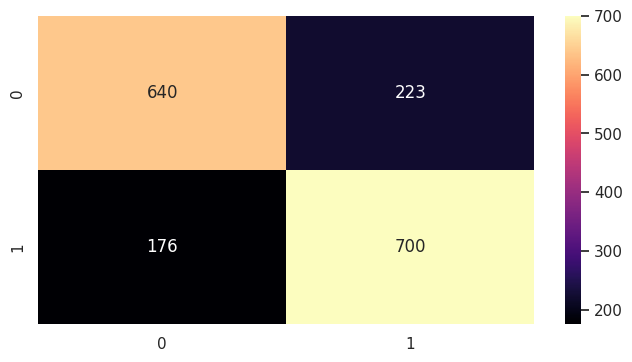

In [ ]:
model_prediction(LogisticRegression())

Accuracy_Score of SVC() model on Training Data is: 80.14092608570607
Accuracy_Score of SVC() model on Testing Data is: 78.26336975273146
----------------------------------------------------------------------
Precision Score of SVC() model is: 0.7736263736263737
Recall Score of SVC() model is: 0.8036529680365296
F1 Score of SVC() model is: 0.788353863381859
----------------------------------------------------------------------
Confusion Matrix of SVC() model is:


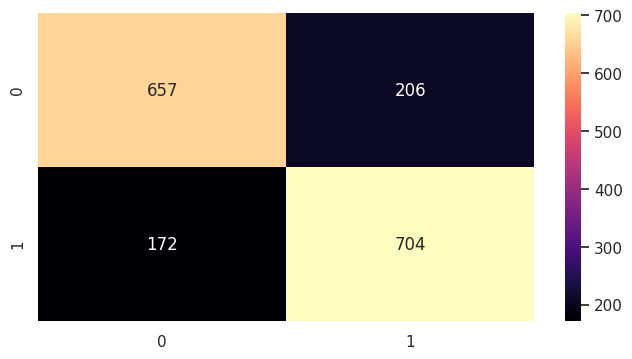

In [ ]:
model_prediction(SVC())

##2. Un-Scalled Data


In [ ]:
def model_prediction(model):
    model.fit(x_train,y_train)
    x_train_pred = model.predict(x_train)
    x_test_pred = model.predict(x_test)
    a = accuracy_score(y_train,x_train_pred)*100
    b = accuracy_score(y_test,x_test_pred)*100
    training_score.append(a)
    testing_score.append(b)

    print(f"Accuracy_Score of {model} model on Training Data is:",a)
    print(f"Accuracy_Score of {model} model on Testing Data is:",b)
    print("-"*70)
    print(f"Precision Score of {model} model is:",precision_score(y_test,x_test_pred))
    print(f"Recall Score of {model} model is:",recall_score(y_test,x_test_pred))
    print(f"F1 Score of {model} model is:",f1_score(y_test,x_test_pred))
    print("-"*70)
    print(f"Confusion Matrix of {model} model is:")
    cm = confusion_matrix(y_test,x_test_pred)
    plt.figure(figsize=(8,4))
    sns.heatmap(cm,annot=True,fmt="g",cmap="magma")
    plt.show()

Accuracy_Score of DecisionTreeClassifier() model on Training Data is: 100.0
Accuracy_Score of DecisionTreeClassifier() model on Testing Data is: 71.47786083956296
----------------------------------------------------------------------
Precision Score of DecisionTreeClassifier() model is: 0.7204176334106729
Recall Score of DecisionTreeClassifier() model is: 0.708904109589041
F1 Score of DecisionTreeClassifier() model is: 0.714614499424626
----------------------------------------------------------------------
Confusion Matrix of DecisionTreeClassifier() model is:


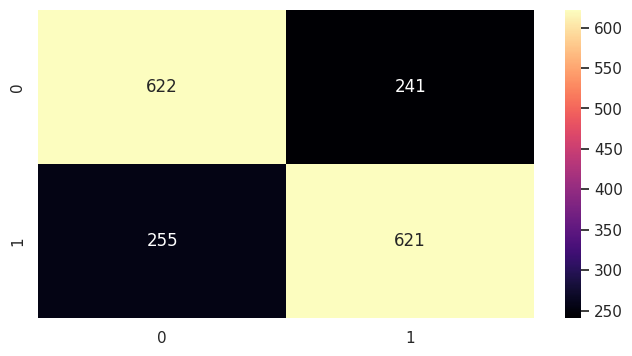

In [ ]:
model_prediction(DecisionTreeClassifier())

Accuracy_Score of RandomForestClassifier() model on Training Data is: 100.0
Accuracy_Score of RandomForestClassifier() model on Testing Data is: 78.66589994249568
----------------------------------------------------------------------
Precision Score of RandomForestClassifier() model is: 0.7960140679953107
Recall Score of RandomForestClassifier() model is: 0.7751141552511416
F1 Score of RandomForestClassifier() model is: 0.785425101214575
----------------------------------------------------------------------
Confusion Matrix of RandomForestClassifier() model is:


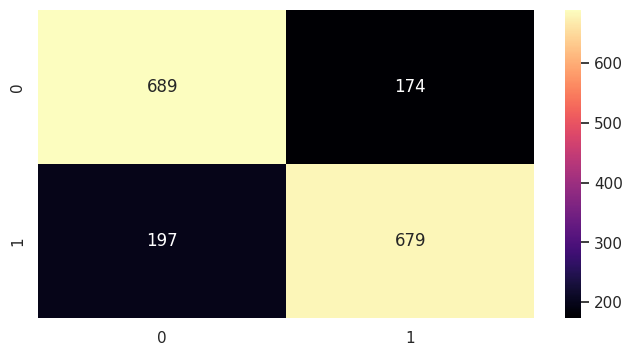

In [ ]:
model_prediction(RandomForestClassifier())

Accuracy_Score of AdaBoostClassifier() model on Training Data is: 79.83894161633593
Accuracy_Score of AdaBoostClassifier() model on Testing Data is: 78.55089131684876
----------------------------------------------------------------------
Precision Score of AdaBoostClassifier() model is: 0.7628004179728317
Recall Score of AdaBoostClassifier() model is: 0.8333333333333334
F1 Score of AdaBoostClassifier() model is: 0.7965084560829242
----------------------------------------------------------------------
Confusion Matrix of AdaBoostClassifier() model is:


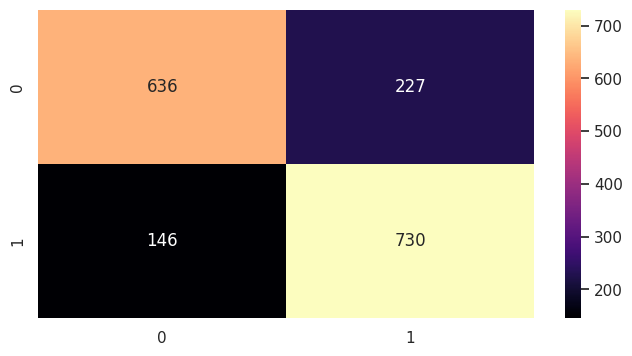

In [ ]:
model_prediction(AdaBoostClassifier())

Accuracy_Score of GradientBoostingClassifier() model on Training Data is: 81.47828587863101
Accuracy_Score of GradientBoostingClassifier() model on Testing Data is: 78.09085681426107
----------------------------------------------------------------------
Precision Score of GradientBoostingClassifier() model is: 0.7608008429926238
Recall Score of GradientBoostingClassifier() model is: 0.8242009132420092
F1 Score of GradientBoostingClassifier() model is: 0.7912328767123289
----------------------------------------------------------------------
Confusion Matrix of GradientBoostingClassifier() model is:


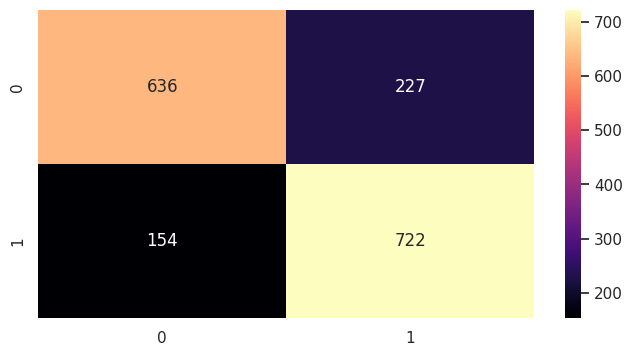

In [ ]:
model_prediction(GradientBoostingClassifier())

Learning rate set to 0.023581
0:	learn: 0.6815710	total: 6.42ms	remaining: 6.42s
1:	learn: 0.6712143	total: 12.3ms	remaining: 6.16s
2:	learn: 0.6609313	total: 17.8ms	remaining: 5.91s
3:	learn: 0.6510957	total: 23.3ms	remaining: 5.81s
4:	learn: 0.6413120	total: 29.4ms	remaining: 5.84s
5:	learn: 0.6319110	total: 35.9ms	remaining: 5.95s
6:	learn: 0.6237148	total: 42.4ms	remaining: 6.01s
7:	learn: 0.6160508	total: 48.2ms	remaining: 5.98s
8:	learn: 0.6099094	total: 53.6ms	remaining: 5.9s
9:	learn: 0.6025720	total: 59ms	remaining: 5.84s
10:	learn: 0.5962252	total: 64.7ms	remaining: 5.81s
11:	learn: 0.5913114	total: 70.9ms	remaining: 5.84s
12:	learn: 0.5848720	total: 76.8ms	remaining: 5.83s
13:	learn: 0.5804179	total: 82.1ms	remaining: 5.78s
14:	learn: 0.5743735	total: 87.7ms	remaining: 5.76s
15:	learn: 0.5693571	total: 93.4ms	remaining: 5.75s
16:	learn: 0.5650030	total: 98.8ms	remaining: 5.71s
17:	learn: 0.5600694	total: 104ms	remaining: 5.69s
18:	learn: 0.5559006	total: 110ms	remaining: 5.6

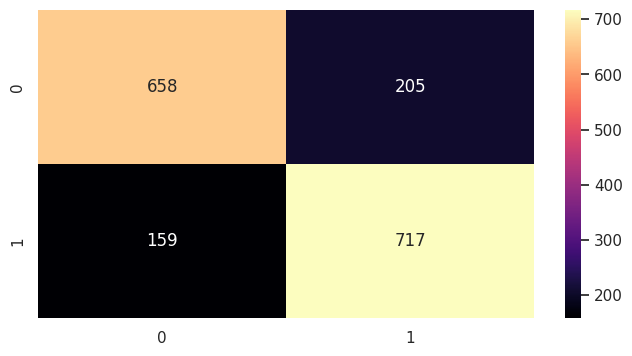

In [ ]:
model_prediction(CatBoostClassifier(verbose=True))

In [ ]:
models = ["Logistic Regression","SVM","Decision Tree","Random Forest","Ada Boost","XGBoost","CatBoost"]
training_score = [77.2073626689675, 80.14092608570607, 100.0, 100.0,
                  79.83894161633593, 81.47828587863101, 86.0655737704918]
testing_score = [77.05577918343876, 78.26336975273146, 71.70787809085681,  78.26336975273146,
                 78.55089131684876, 78.09085681426107, 79.06843013225992]

In [ ]:
df = pd.DataFrame({"Algorithms":models,
                   "Training Score":training_score,
                   "Testing Score":testing_score})

df


,Algorithms,Training Score,Testing Score
0,Logistic Regression,77.207363,77.055779
1,SVM,80.140926,78.263370
2,Decision Tree,100.000000,71.707878
3,Random Forest,100.000000,78.263370
4,Ada Boost,79.838942,78.550891
5,XGBoost,81.478286,78.090857
6,CatBoost,86.065574,79.068430


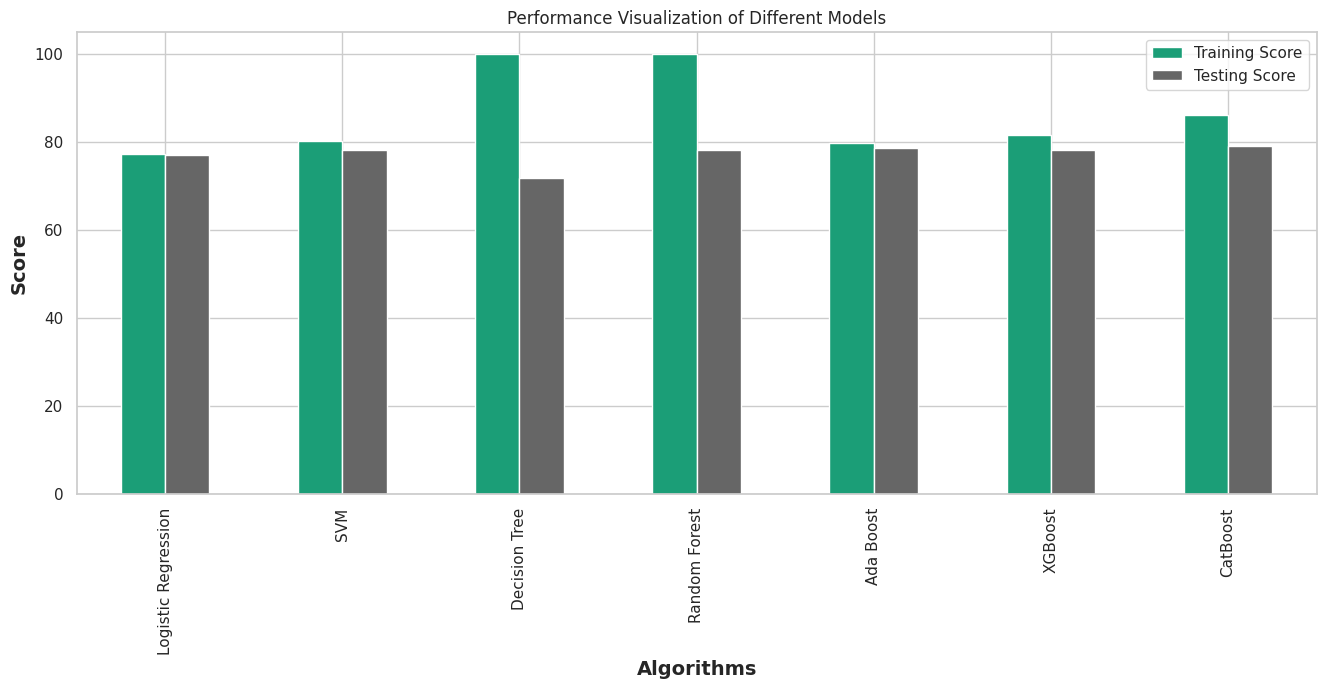

In [ ]:
df.plot(x="Algorithms",y=["Training Score","Testing Score"], figsize=(16,6),kind="bar",
        title="Performance Visualization of Different Models",colormap="Dark2")
plt.xlabel("Algorithms", fontsize=14, fontweight='bold')
plt.ylabel("Score", fontsize=14, fontweight='bold')
plt.show()

# Predicting the Data using RandomForestClassifier


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


Accuracy Score of RandomForestClassifier model on Training Data is: 100.0
Accuracy Score of RandomForestClassifier model on Testing Data is: 78.55089131684876
----------------------------------------------------------------------
Precision Score of RandomForestClassifier model is: 0.8041112454655381
Recall Score of RandomForestClassifier model is: 0.7591324200913242
F1 Score of RandomForestClassifier model is: 0.7809747504403992
----------------------------------------------------------------------
Confusion Matrix of RandomForestClassifier model is:


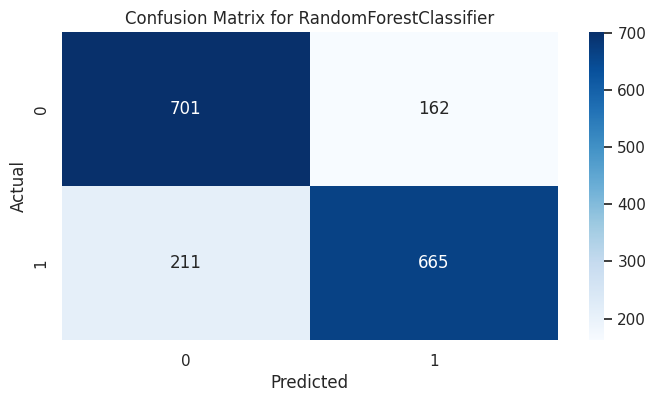

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


  PassengerId  Transported
0     0013_01         True
1     0018_01        False
2     0019_01         True
3     0021_01         True
4     0023_01        False


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s


In [53]:
training_score = []
testing_score = []

# Global variable to hold the trained model
trained_model = None

def model_prediction(model):
    global trained_model
    model.fit(x_train, y_train)
    x_train_pred = model.predict(x_train)
    x_test_pred = model.predict(x_test)

    a = accuracy_score(y_train, x_train_pred) * 100
    b = accuracy_score(y_test, x_test_pred) * 100

    training_score.append(a)
    testing_score.append(b)

    print(f"Accuracy Score of {model.__class__.__name__} model on Training Data is:", a)
    print(f"Accuracy Score of {model.__class__.__name__} model on Testing Data is:", b)
    print("-" * 70)
    print(f"Precision Score of {model.__class__.__name__} model is:", precision_score(y_test, x_test_pred))
    print(f"Recall Score of {model.__class__.__name__} model is:", recall_score(y_test, x_test_pred))
    print(f"F1 Score of {model.__class__.__name__} model is:", f1_score(y_test, x_test_pred))
    print("-" * 70)
    print(f"Confusion Matrix of {model.__class__.__name__} model is:")

    cm = confusion_matrix(y_test, x_test_pred)
    plt.figure(figsize=(8, 4))
    sns.heatmap(cm, annot=True, fmt="g", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix for {model.__class__.__name__}")
    plt.show()

    trained_model = model

# Train and evaluate RandomForestClassifier
model_prediction(RandomForestClassifier(verbose=True))

# Predicting on training and test data using the trained model
x_train_pred5 = trained_model.predict(x_train)
x_test_pred5 = trained_model.predict(x_test)

# Predicting on the test dataframe
pred = trained_model.predict(test_df)

# Preparing the submission DataFrame
pass_df["Transported"] = pred

# Replace numerical predictions with boolean values
pass_df["Transported"].replace({1: True, 0: False}, inplace=True)

# Display the DataFrame
print(pass_df.head())

# Save the DataFrame to a CSV file
pass_df.to_csv("spaceship_prediction_project.csv", index=False)